# **20180490 이재헌**

# **컴퓨터 통계 방법론 기말 프로젝트**

# **File Import**

In [ ]:
# 구글드라이브 csv 공유파일 불러오기
import pandas as pd
url="https://drive.google.com/file/d/1Yyizo7HlaJK-niMro_CbNcrrI9BZn-SB/view?usp=sharing" #구글드라이브 csv파일 이미지 주소
path='https://drive.google.com/uc?id='+url.split('/')[-2]
print("▶ 공유파일 링크변환 경로명 : ", path)
df=pd.read_csv(path)
df.head()

▶ 공유파일 링크변환 경로명 :  https://drive.google.com/uc?id=1Yyizo7HlaJK-niMro_CbNcrrI9BZn-SB


,disc_hire,gender,age,edu_cat,mariage,emp_fin,income_quartile,birth_region,health,disability,residence,disc_wage,disc_jobedu,disc_promotion,disc_resign,disc_edu,disc_home,disc_social
0,1.0,0,3,1,2,0,0,0,1,0,1,1,0,0,0,0,0,0
1,0.0,1,3,1,2,1,1,0,2,0,1,0,0,0,0,0,0,0
2,0.0,1,1,2,0,1,1,0,2,0,1,0,0,0,0,0,0,0
3,0.0,1,1,2,1,0,3,0,1,0,1,0,0,0,0,0,0,0
4,1.0,0,3,0,1,0,1,0,2,0,1,0,0,0,0,0,0,1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy import stats
from scipy.stats import (ttest_1samp , ttest_rel , ttest_ind , t as t_dbn)
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multitest import multipletests as mult_test

from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import (KMeans, AgglomerativeClustering)
from scipy.cluster.hierarchy import (dendrogram, cut_tree)

In [ ]:
pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 47.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 52.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=36e5dc732880deab02a1107e6cafd8adc11ff5e20b968c164ae1e4b1bbf13960
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    U

In [ ]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize)
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA , QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from ISLP.cluster import compute_linkage

# **Question 1:**

### What are the important variables that are associated with the experience of hiring discrimination?

### How are those variables related to the experience of hiring discrimination?

Key point: Larger coefficients don’t necessarily represent more important independent variables.

Key point: Low p-values don’t necessarily represent independent variables that are practically important.

Key point: Identify the independent variable that has the largest absolute value for its standardized coefficient.

Key point: Identify the independent variable that produces the largest R-squared increase when it is the last variable added to the model.

m.fit((X - np.mean(X,0)) / np.std(X, 0), y)

print(m.coef_)

In [ ]:
df.head()

,disc_hire,gender,age,edu_cat,mariage,emp_fin,income_quartile,birth_region,health,disability,residence,disc_wage,disc_jobedu,disc_promotion,disc_resign,disc_edu,disc_home,disc_social
0,1.0,0,3,1,2,0,0,0,1,0,1,1,0,0,0,0,0,0
1,0.0,1,3,1,2,1,1,0,2,0,1,0,0,0,0,0,0,0
2,0.0,1,1,2,0,1,1,0,2,0,1,0,0,0,0,0,0,0
3,0.0,1,1,2,1,0,3,0,1,0,1,0,0,0,0,0,0,0
4,1.0,0,3,0,1,0,1,0,2,0,1,0,0,0,0,0,0,1


In [ ]:
df.describe()

,disc_hire,gender,age,edu_cat,mariage,emp_fin,income_quartile,birth_region,health,disability,residence,disc_wage,disc_jobedu,disc_promotion,disc_resign,disc_edu,disc_home,disc_social
count,3479.000000,3576.000000,3576.000000,3576.000000,3576.000000,3576.000000,3576.000000,3576.000000,3576.000000,3576.000000,3576.000000,3576.000000,3576.000000,3576.000000,3576.000000,3576.000000,3576.000000,3576.000000
mean,0.197183,0.394575,1.993848,1.119966,0.814597,0.237136,1.745805,0.191275,1.400447,0.025727,6.253356,0.180928,0.226230,0.306208,0.249161,0.097315,0.038311,0.091163
std,0.397929,0.488828,1.194377,0.762685,0.516058,0.425386,1.058028,0.393360,0.681126,0.158342,4.575901,0.420436,0.617683,0.678481,0.646669,0.417831,0.232801,0.308518
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,3.000000,2.000000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,5.000000,2.000000,2.000000,1.000000,3.000000,1.000000,3.000000,1.000000,15.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
df_copy = df.copy()
df_app = df_copy[(df['disc_hire'] == 0).astype('bool') | (df['disc_hire'] == 1).astype('bool')] # Applicable Data
y = df_app['disc_hire'].copy() # disc_hire
X = df_app.iloc[:,1:].copy() # other columns

## **Observation:**

'disc_wage', 'disc_jobedu', 'disc_promotion', 'disc_resign', 'disc_edu', 'disc_home', 'disc_social'의 값에는 Not Applicable data의 값이 2로 기록되어있다.

이 값을 0에서 1 사이로 바꿔주는 게 적당한 것 같다고 생각하였다.

각 column별로 2를 제외하고 구한 평균값을 2 대신 넣어주면, scaling 했을 때 평균값들은 모두 0이 되므로 2 대신 평균값을 넣어주기로 하였다.

In [ ]:
X.columns

Index(['gender', 'age', 'edu_cat', 'mariage', 'emp_fin', 'income_quartile',
       'birth_region', 'health', 'disability', 'residence', 'disc_wage',
       'disc_jobedu', 'disc_promotion', 'disc_resign', 'disc_edu', 'disc_home',
       'disc_social'],
      dtype='object')

In [ ]:
X_app = X.copy()
means = []

for var in X.columns:
  if ('disc' in var):
    col = X[var]
    sum = 0
    count = 0
    l = len(col)
    for i in range(l):
      if col.iloc[i] != 2:
        sum += col.iloc[i]
        count += 1
    mean = sum / count
    means.append(mean)
    for i in range(l):
      if col.iloc[i] == 2:
        X_app[var].iloc[i] = mean

X_app.shape

<ipython-input-9-339722374131>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_app[var].iloc[i] = mean


(3479, 17)

In [ ]:
means

[0.15369088811995385,
 0.021856192587899906,
 0.06525974025974025,
 0.0204211869814933,
 0.01104148015517756,
 0.020851433536055605,
 0.07830106905518636]

In [ ]:
X_app

,gender,age,edu_cat,mariage,emp_fin,income_quartile,birth_region,health,disability,residence,disc_wage,disc_jobedu,disc_promotion,disc_resign,disc_edu,disc_home,disc_social
0,0,3,1,2,0,0,0,1,0,1,1.0,0.000000,0.00000,0.000000,0.0,0.0,0.0
1,1,3,1,2,1,1,0,2,0,1,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0
2,1,1,2,0,1,1,0,2,0,1,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0
3,1,1,2,1,0,3,0,1,0,1,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0
4,0,3,0,1,0,1,0,2,0,1,0.0,0.000000,0.00000,0.000000,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,0,1,2,1,0,3,0,2,0,5,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0
3572,0,1,1,1,1,0,0,1,0,3,0.0,0.021856,0.00000,0.020421,0.0,0.0,0.0
3573,0,1,1,1,0,0,1,0,0,1,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0
3574,0,1,2,1,0,0,0,1,0,8,0.0,0.000000,0.06526,0.020421,0.0,0.0,0.0


## Correlation

In [ ]:
print('Correaltion of disc_hire with repect to each variable')
corr_coeff_list = []
for col in X_app.columns:
  r = stats.pearsonr(X_app[col], y).statistic
  corr_coeff_list.append({'variable' : col , 'correlation' : r})
corr_coeff_list.sort(key=lambda k : abs(k['correlation']), reverse=True)
for dict in corr_coeff_list:
  key, value = dict.items()
  print(key[1], " : ", value[1])

Correaltion of disc_hire with repect to each variable
disc_wage  :  0.6295803472606901
disc_social  :  0.3177017098600349
disc_promotion  :  0.2330898418994605
disc_resign  :  0.22434538252118089
disc_jobedu  :  0.21561331302082498
edu_cat  :  -0.18122465963652767
income_quartile  :  -0.17947442299470145
disc_home  :  0.16181032007132162
emp_fin  :  0.15331820400340926
disc_edu  :  0.09986301712643753
health  :  0.09002393573477176
age  :  0.08808585005683363
disability  :  0.07985001614343912
birth_region  :  -0.03616662107234033
gender  :  0.028481598991618836
residence  :  0.023151828427013427
mariage  :  0.015606196448611167


## Logistic regression without scaling

In [ ]:
glm = sm.GLM(y, X_app, family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
gender,-0.3555,0.119,-2.987,0.003
age,-0.0922,0.058,-1.576,0.115
edu_cat,-0.5520,0.073,-7.518,0.000
mariage,-0.6125,0.131,-4.673,0.000
emp_fin,0.2532,0.126,2.009,0.044
income_quartile,-0.4667,0.054,-8.711,0.000
birth_region,-0.2146,0.149,-1.442,0.149
health,-0.2133,0.079,-2.703,0.007
disability,0.1027,0.329,0.312,0.755
residence,-0.0013,0.012,-0.112,0.911


In [ ]:
results.pvalues.sort_values()

disc_wage          1.390212e-107
income_quartile     3.005139e-18
disc_social         5.166992e-14
edu_cat             5.570340e-14
disc_home           7.814848e-08
mariage             2.964923e-06
disc_resign         4.220717e-06
gender              2.815846e-03
health              6.871271e-03
disc_jobedu         1.667592e-02
emp_fin             4.448487e-02
age                 1.149773e-01
birth_region        1.491746e-01
disc_edu            1.601360e-01
disc_promotion      6.506793e-01
disability          7.547255e-01
residence           9.110757e-01
dtype: float64

In [ ]:
X_app.columns[np.argmin(abs(results.pvalues))] # Variable with the largest absolute value of coefficient

'disc_wage'

## Logistic regression with Scaling

In [ ]:
# scaler = StandardScaler(with_std=True, with_mean=True)
X_scaled = (X_app - np.mean(X_app,0)) / np.std(X_app, 0)
X_scaled

,gender,age,edu_cat,mariage,emp_fin,income_quartile,birth_region,health,disability,residence,disc_wage,disc_jobedu,disc_promotion,disc_resign,disc_edu,disc_home,disc_social
0,-0.809863,0.857677,-0.159345,2.301144,-0.555769,-1.655951,-0.487481,-0.587875,-0.16203,-1.145329,2.350326,-1.569191e-01,-2.808207e-01,-0.152124,-0.107663,-0.146478,-0.292224
1,1.234777,0.857677,-0.159345,2.301144,1.799310,-0.708721,-0.487481,0.886686,-0.16203,-1.145329,-0.426822,-1.569191e-01,-2.808207e-01,-0.152124,-0.107663,-0.146478,-0.292224
2,1.234777,-0.826216,1.151205,-1.571947,1.799310,-0.708721,-0.487481,0.886686,-0.16203,-1.145329,-0.426822,-1.569191e-01,-2.808207e-01,-0.152124,-0.107663,-0.146478,-0.292224
3,1.234777,-0.826216,1.151205,0.364598,-0.555769,1.185739,-0.487481,-0.587875,-0.16203,-1.145329,-0.426822,-1.569191e-01,-2.808207e-01,-0.152124,-0.107663,-0.146478,-0.292224
4,-0.809863,0.857677,-1.469896,0.364598,-0.555769,-0.708721,-0.487481,0.886686,-0.16203,-1.145329,-0.426822,-1.569191e-01,-2.808207e-01,-0.152124,-0.107663,-0.146478,3.439831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,-0.809863,-0.826216,1.151205,0.364598,-0.555769,1.185739,-0.487481,0.886686,-0.16203,-0.266745,-0.426822,-1.569191e-01,-2.808207e-01,-0.152124,-0.107663,-0.146478,-0.292224
3572,-0.809863,-0.826216,-0.159345,0.364598,1.799310,-1.655951,-0.487481,-0.587875,-0.16203,-0.706037,-0.426822,2.490930e-17,-2.808207e-01,0.000000,-0.107663,-0.146478,-0.292224
3573,-0.809863,-0.826216,-0.159345,0.364598,-0.555769,-1.655951,2.051361,-2.062435,-0.16203,-1.145329,-0.426822,-1.569191e-01,-2.808207e-01,-0.152124,-0.107663,-0.146478,-0.292224
3574,-0.809863,-0.826216,1.151205,0.364598,-0.555769,-1.655951,-0.487481,-0.587875,-0.16203,0.392193,-0.426822,-1.569191e-01,-5.971782e-17,0.000000,-0.107663,-0.146478,-0.292224


In [ ]:
glm_scaled = sm.GLM(y, X_scaled, family=sm.families.Binomial())
results_scaled = glm_scaled.fit()
summarize(results_scaled)

,coef,std err,z,P>|z|
gender,-0.0518,0.045,-1.150,0.250
age,0.1216,0.058,2.085,0.037
edu_cat,0.0032,0.053,0.061,0.952
mariage,-0.1382,0.054,-2.559,0.010
emp_fin,0.1284,0.046,2.807,0.005
income_quartile,-0.1575,0.046,-3.420,0.001
birth_region,-0.0332,0.043,-0.772,0.440
health,0.0582,0.045,1.288,0.198
disability,0.0366,0.044,0.822,0.411
residence,0.0920,0.043,2.145,0.032


In [ ]:
results_scaled.pvalues.sort_values()

disc_wage          2.976096e-62
disc_resign        3.793729e-17
disc_social        1.655163e-13
disc_home          4.950384e-06
income_quartile    6.259342e-04
disc_jobedu        4.892201e-03
emp_fin            5.004861e-03
mariage            1.048899e-02
residence          3.191839e-02
age                3.710601e-02
disc_edu           1.731857e-01
health             1.975961e-01
gender             2.503133e-01
disc_promotion     2.544269e-01
disability         4.109147e-01
birth_region       4.400138e-01
edu_cat            9.515474e-01
dtype: float64

In [ ]:
X_app.columns[np.argmin(abs(results_scaled.pvalues))] # Variable with the largest absolute value of coefficient

'disc_wage'

# **Question 2:**

• What are the important principle components
(PC) that explain a large portion of variation in the following
12 explanatory variables (gender, age, education level,
employment status, income, self rated health, disability, and
experiences of discrimination in receiving income, training,
getting promoted, being fired, and obtaining higher
education)? How would you interpret those PCs?

• To answer this, you have to conduct the principle component
analysis for the 12 variables. You have to choose an appropriate
number of important PCs based on some criteria. Though the 12
variables are discrete, you may just take them as continuous
variables.

In [ ]:
df_12 = df[['gender','age','edu_cat','emp_fin','income_quartile','health','disability','disc_wage','disc_jobedu','disc_promotion','disc_resign','disc_edu']]
df_12.head()

,gender,age,edu_cat,emp_fin,income_quartile,health,disability,disc_wage,disc_jobedu,disc_promotion,disc_resign,disc_edu
0,0,3,1,0,0,1,0,1,0,0,0,0
1,1,3,1,1,1,2,0,0,0,0,0,0
2,1,1,2,1,1,2,0,0,0,0,0,0
3,1,1,2,0,3,1,0,0,0,0,0,0
4,0,3,0,0,1,2,0,0,0,0,0,0


In [ ]:
df_12_app = df_12.copy()

for var in df_12.columns:
  if ('disc' in var):
    col = df_12[var]
    sum = 0
    count = 0
    l = len(col)
    for i in range(l):
      if col.iloc[i] != 2:
        sum += col.iloc[i]
        count += 1
    mean = sum / count
    for i in range(l):
      if col.iloc[i] == 2:
        df_12_app[var].iloc[i] = mean

df_12_app

<ipython-input-21-6b3a2dfc99dd>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_12_app[var].iloc[i] = mean


,gender,age,edu_cat,emp_fin,income_quartile,health,disability,disc_wage,disc_jobedu,disc_promotion,disc_resign,disc_edu
0,0,3,1,0,0,1,0,1.0,0.000000,0.000000,0.00000,0.0
1,1,3,1,1,1,2,0,0.0,0.000000,0.000000,0.00000,0.0
2,1,1,2,1,1,2,0,0.0,0.000000,0.000000,0.00000,0.0
3,1,1,2,0,3,1,0,0.0,0.000000,0.000000,0.00000,0.0
4,0,3,0,0,1,2,0,0.0,0.000000,0.000000,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3571,0,1,2,0,3,2,0,0.0,0.000000,0.000000,0.00000,0.0
3572,0,1,1,1,0,1,0,0.0,0.022139,0.000000,0.02055,0.0
3573,0,1,1,0,0,0,0,0.0,0.000000,0.000000,0.00000,0.0
3574,0,1,2,0,0,1,0,0.0,0.000000,0.066709,0.02055,0.0


## Scaling & Getting PCs

In [ ]:
scaler = StandardScaler(with_std=True, with_mean=True)
df_12_scaled = scaler.fit_transform(df_12)
pca12 = PCA()
pca12.fit(df_12_scaled)
pca12.components_

array([[ 0.0967994 ,  0.18673067, -0.2961864 ,  0.24908191, -0.25663983,
         0.15727736,  0.08308193,  0.33641381,  0.44475371,  0.44351429,
         0.32367366,  0.30990464],
       [ 0.01222606, -0.45145757,  0.45097202, -0.28549875,  0.2484102 ,
        -0.37423932, -0.15221105,  0.14674568,  0.23645341,  0.26417611,
         0.35309202,  0.11963645],
       [-0.7398163 ,  0.31504785,  0.03482963, -0.3202072 ,  0.1272665 ,
        -0.03918644,  0.44313261,  0.08889191,  0.00699222, -0.00406669,
         0.10196391,  0.13118023],
       [ 0.04430491, -0.41267763,  0.09229949,  0.23003034, -0.41600896,
        -0.22633417,  0.70000597, -0.01824059, -0.02082637,  0.00795096,
        -0.01445539, -0.22575096],
       [ 0.44359291, -0.06376809,  0.13352634, -0.23302914,  0.36777423,
         0.55018747,  0.46513226, -0.02610956, -0.06920427, -0.06160413,
         0.09302849,  0.23408255],
       [-0.23615956, -0.2319425 ,  0.23237183,  0.02135397, -0.44153988,
         0.26953151, -

PC normalization 확인

In [ ]:
comp0 = pca12.components_[0]
print(np.sum(np.square(comp0)))

0.9999999999999986


## Biplots

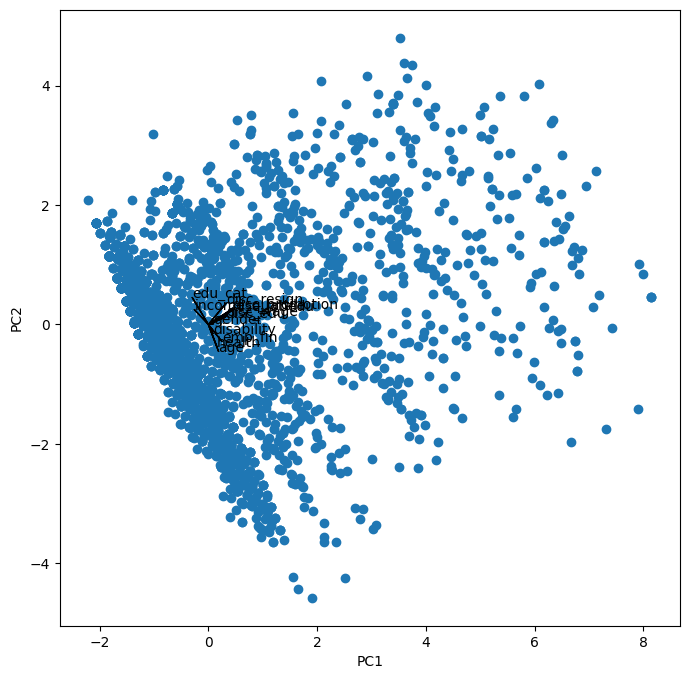

In [ ]:
scores = pca12.transform(df_12_scaled)

i, j, k = 0, 1, 2 # which components
fig , ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
# ax.scatter(scores[df['disc_hire']==0][:,0], scores[df['disc_hire']==0][:,1])
# ax.scatter(scores[df['disc_hire']==1][:,0], scores[df['disc_hire']==1][:,1],color='r')
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pca12.components_.shape[1]):
  ax.arrow(0, 0, pca12.components_[i,k], pca12.components_[j,k])
  ax.text(pca12.components_[i,k], pca12.components_[j,k], df_12.columns[k])

In [ ]:
scores.shape

(3576, 12)

Text(0.5, 1.0, 'Biplot for the 12 variables')

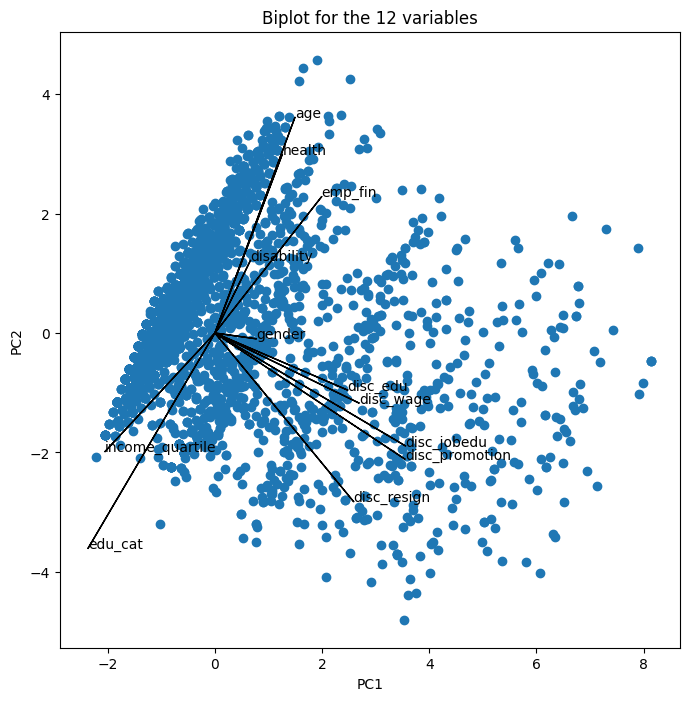

In [ ]:
scale_arrow = s_ = 8
scores[:,1] *= -1
pca12.components_[1] *= -1 # flip the y-axis
fig , ax = plt.subplots(1, 1, figsize=(8, 8))
var = 'disc_wage'
ax.scatter(scores[:,0], scores[:,1])
# ax.scatter(scores[df[var]!=1][:,0], scores[df[var]!=1][:,1])
# ax.scatter(scores[df[var]==1][:,0], scores[df[var]==1][:,1],color='r')
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pca12.components_.shape[1]):
  ax.arrow(0, 0, s_*pca12.components_[i,k], s_*pca12.components_[j,k])
  ax.text(s_*pca12.components_[i,k], s_*pca12.components_[j,k], df_12.columns[k])
plt.title('Biplot for the 12 variables')

In [ ]:
# scale_arrow = s_ = 8
# scores[:,1] *= -1
# pca12.components_[1] *= -1 # flip the y-axis
# fig = plt.figure(figsize=(8,8))
# ax = fig.add_subplot(projection='3d')
# var = 'disc_wage'
# ax.scatter(scores[:,0], scores[:,1], scores[:,2])
# ax.set_xlabel('PC%d' % (i+1))
# ax.set_ylabel('PC%d' % (j+1))
# ax.set_zlabel('PC%d' % (k+1))
# for k in range(pca12.components_.shape[1]):
#   ax.arrow(0, 0, s_*pca12.components_[i,k], s_*pca12.components_[j,k])
#   ax.text(s_*pca12.components_[i,k], s_*pca12.components_[j,k], df_12.columns[k])

In [ ]:
%%capture
fig , axes = plt.subplots(1, 2, figsize=(15, 6))
ticks = np.arange(pca12.n_components_)+1
ax = axes[0]
ax.plot(ticks ,pca12.explained_variance_ratio_ ,marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks)
ax.grid()

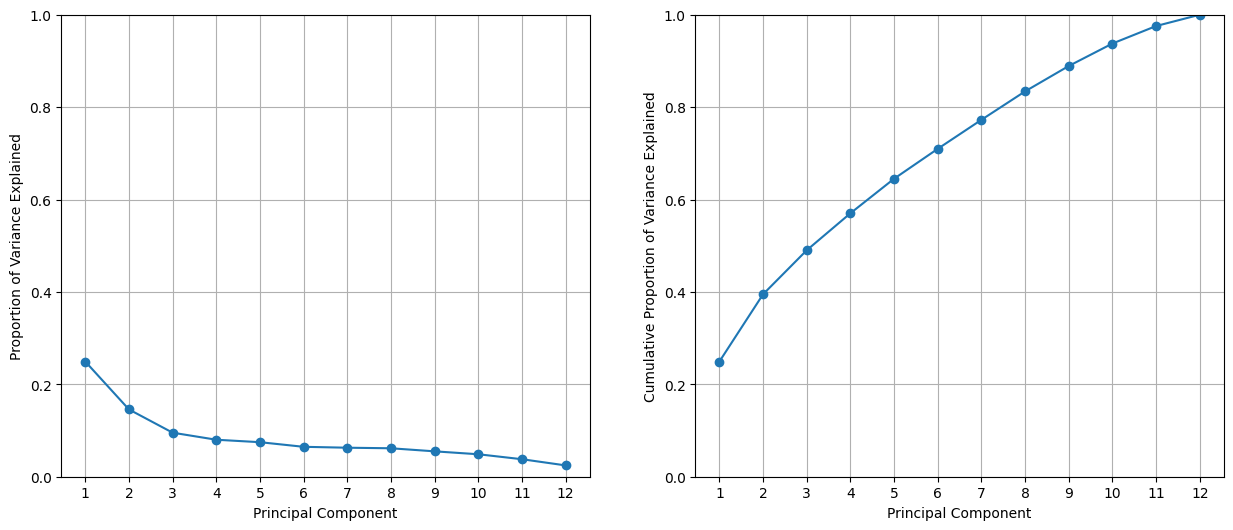

In [ ]:
ax = axes[1]
ax.plot(ticks ,pca12.explained_variance_ratio_.cumsum(),
marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
ax.grid()
fig

In [ ]:
np.sum(pca12.explained_variance_ratio_[:3])

0.49018202814566647

In [ ]:
np.sum(pca12.explained_variance_ratio_[:4])

0.5702449908929701

### I choose n = 4

In [ ]:
pca12.explained_variance_ratio_ > 1/12

array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False])

PCA dim reduction

In [ ]:
model2 = PCA(n_components=2) # default는 자기 차원 그대로
pca_2 = model2.fit_transform(df_12_scaled)
pca_2.shape

(3576, 2)

[]

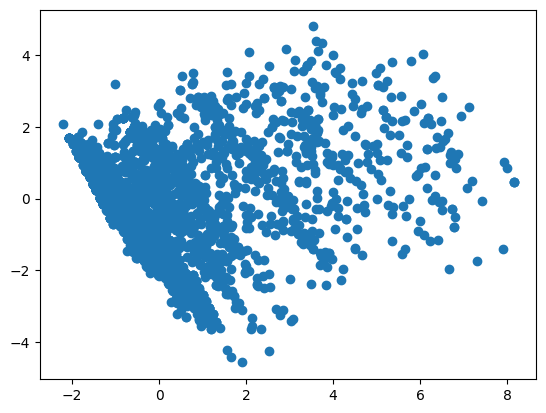

In [ ]:
plt.scatter(pca_2[:,0],pca_2[:,1])
plt.plot()

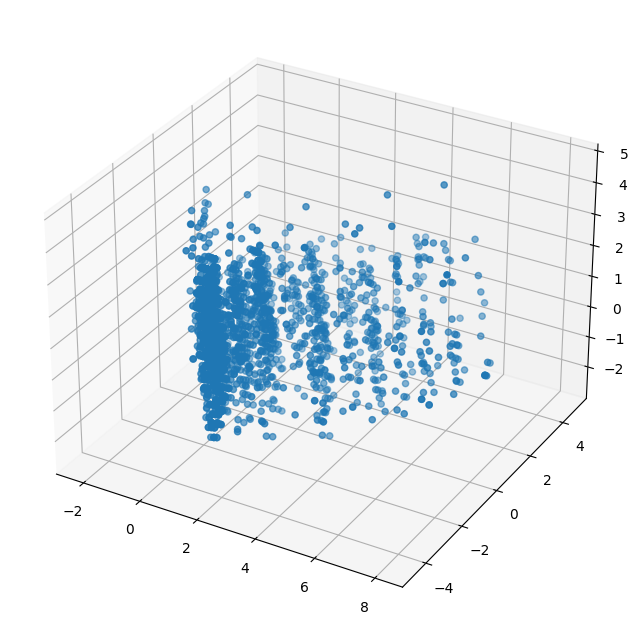

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

model3 = PCA(n_components=3) # default는 자기 차원 그대로
pca_3 = model3.fit_transform(df_12_scaled)
pca_3.shape

ax.scatter(pca_3[:,0],pca_3[:,1],pca_3[:,2])

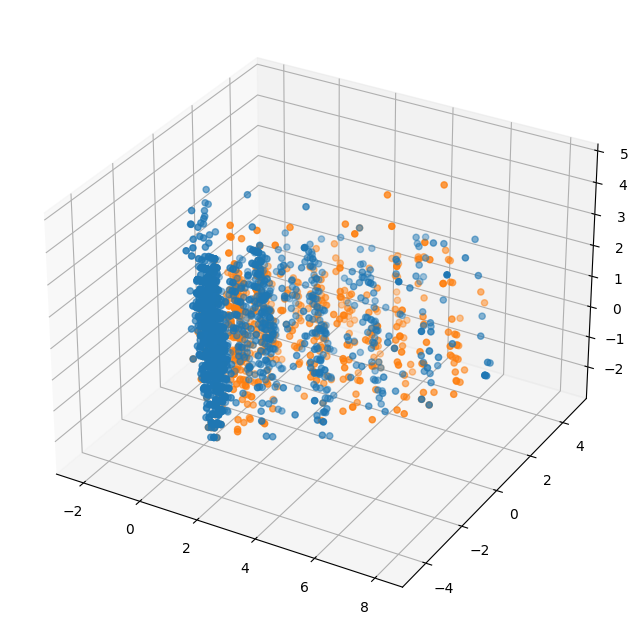

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

model3 = PCA(n_components=3) # default는 자기 차원 그대로
pca_3 = model3.fit_transform(df_12_scaled)
pca_3.shape

var = 'disc_hire'

ax.scatter(pca_3[df[var]!=1][:,0],pca_3[df[var]!=1][:,1],pca_3[df[var]!=1][:,2])
ax.scatter(pca_3[df[var]==1][:,0],pca_3[df[var]==1][:,1],pca_3[df[var]==1][:,2])

In [ ]:
pca_3_components = model3.fit(df_12_scaled).components_
pca_3_components

array([[ 0.0967994 ,  0.18673067, -0.2961864 ,  0.24908191, -0.25663983,
         0.15727736,  0.08308193,  0.33641381,  0.44475371,  0.44351429,
         0.32367366,  0.30990464],
       [ 0.01222606, -0.45145757,  0.45097202, -0.28549875,  0.2484102 ,
        -0.37423932, -0.15221105,  0.14674568,  0.23645341,  0.26417611,
         0.35309202,  0.11963645],
       [-0.7398163 ,  0.31504785,  0.03482963, -0.3202072 ,  0.1272665 ,
        -0.03918644,  0.44313261,  0.08889191,  0.00699222, -0.00406669,
         0.10196391,  0.13118023]])

In [ ]:
3 * pca_3_components[0] + 2 * pca_3_components[1]

array([ 0.31485032, -0.34272311,  0.01338483,  0.17624822, -0.27309909,
       -0.27664656, -0.05517631,  1.30273279,  1.80716797,  1.85889511,
        1.67720502,  1.16898683])

# **Question 3:**

• Identify subgroups (clusters) based on the 12
variables you use for PCA to answer question 2. Also, identify
subgroups based on the important PCs you find to answer
question 2. Compare the clustering results.


• To answer this, you have to conduct a cluster analysis. You have to
decide an appropriate number of clusters based on some criteria.
Once you determine the number of clusters, you need to provide
description about the characteristics of each cluster.

### n = 4

## K means

In [ ]:
model4 = PCA(n_components=4) # default는 자기 차원 그대로
pca_4 = model4.fit_transform(df_12_scaled)
pca_4.shape

(3576, 4)

### How many centers?

Text(0.5, 1.0, 'inertia with respect to the number of centers')

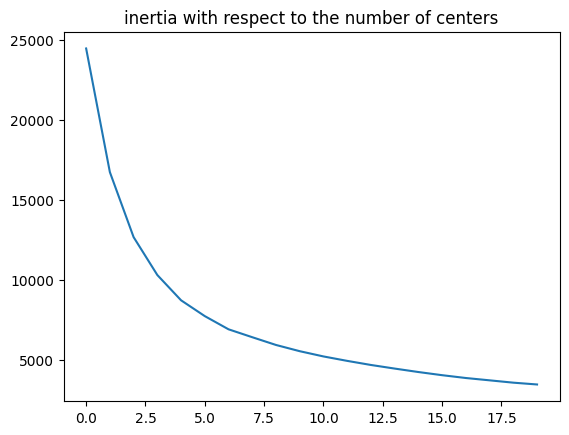

In [ ]:
inertia = []
for i in range(20):
  kmeans = KMeans(n_clusters=i+1, random_state=2, n_init=100).fit(pca_4)
  inertia.append(kmeans.inertia_)
plt.plot(inertia)
plt.title('inertia with respect to the number of centers')

In [ ]:
for i in range(20):
  if (inertia[i+1] - inertia[i+2]) > 0.7 * (inertia[i] - inertia[i+1]):
    print(i)
    break

4


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=2, n_init=200).fit(pca_4)

kmeans.labels_

array([0, 0, 0, ..., 2, 1, 2], dtype=int32)

In [ ]:
np.set_printoptions(precision=6, suppress=True)

In [ ]:
centers = kmeans.cluster_centers_
centers

array([[ 0.288024, -1.429293, -0.323024, -0.220904],
       [ 3.554681,  1.268598, -0.070654, -0.247247],
       [-0.997864,  0.529278,  0.040812, -0.020374],
       [ 1.483831, -1.678755,  3.101806,  4.156634]])

In [ ]:
label2color = []
for i in kmeans.labels_:
  if i == 0:
    label2color.append('black')
  if i == 1:
    label2color.append('red')
  if i == 2:
    label2color.append('green')
  if i == 3:
    label2color.append('blue')

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


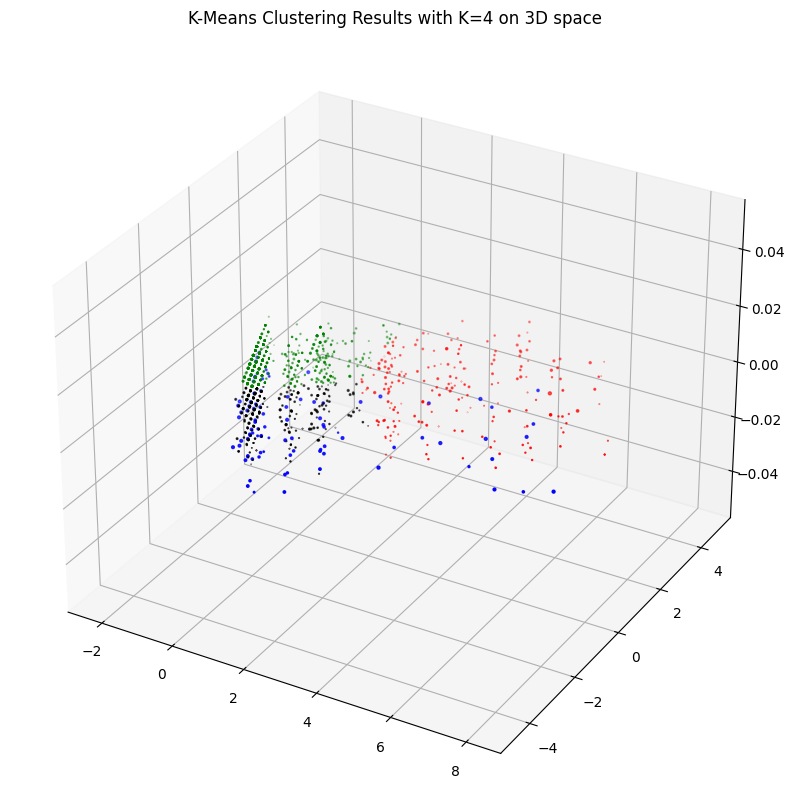

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
# plt.scatter(pca_4[:,0],pca_4[:,1],pca_4[:,2], c=kmeans.labels_)
plt.scatter(pca_4[:,0],pca_4[:,1],pca_4[:,2], c=label2color)
ax.set_title("K-Means Clustering Results with K=4 on 3D space");

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


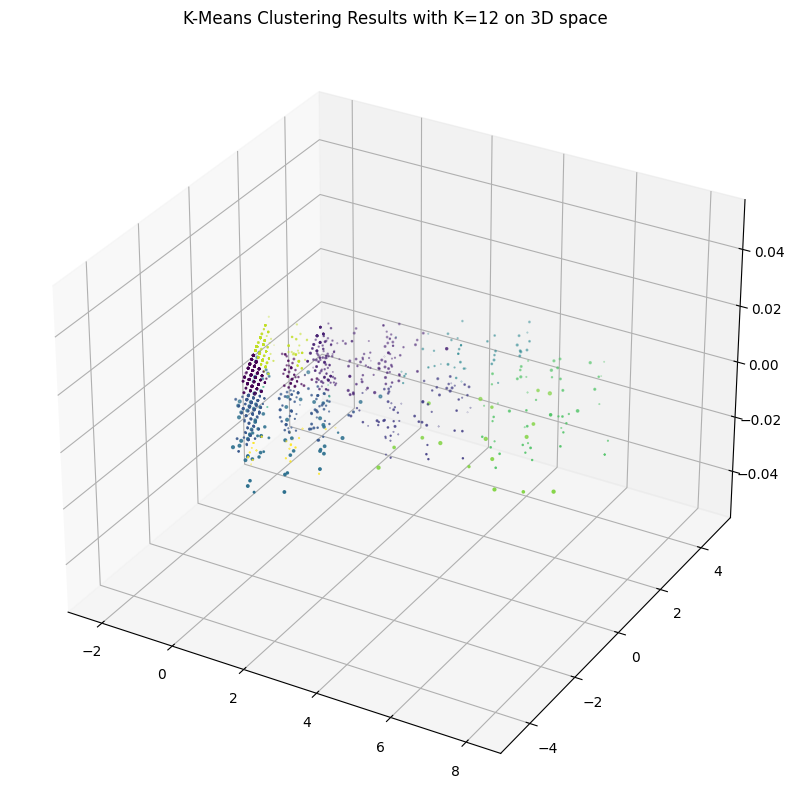

In [ ]:
kmeans = KMeans(n_clusters=12, random_state=2, n_init=200).fit(pca_4)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
plt.scatter(pca_4[:,0],pca_4[:,1],pca_4[:,2], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=12 on 3D space");

## Hierarchical

In [ ]:
HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0, n_clusters=None, linkage='complete')
hc_comp.fit(pca_4)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

In [ ]:
hc_avg = HClust(distance_threshold=0, n_clusters=None, linkage='average');
hc_avg.fit(pca_4)
hc_sing = HClust(distance_threshold=0, n_clusters=None, linkage='single');
hc_sing.fit(pca_4);

In [ ]:
D = np.zeros((pca_4.shape[0], pca_4.shape[0]));
for i in range(pca_4.shape[0]):
  x_ = np.multiply.outer(np.ones(pca_4.shape[0]), pca_4[i])
  D[i] = np.sqrt(np.sum((pca_4 - x_)**2, 1));
hc_sing_pre = HClust(distance_threshold=0, n_clusters=None, metric='precomputed', linkage='single')
hc_sing_pre.fit(D)

AgglomerativeClustering(distance_threshold=0, linkage='single',
                        metric='precomputed', n_clusters=None)

### Complete

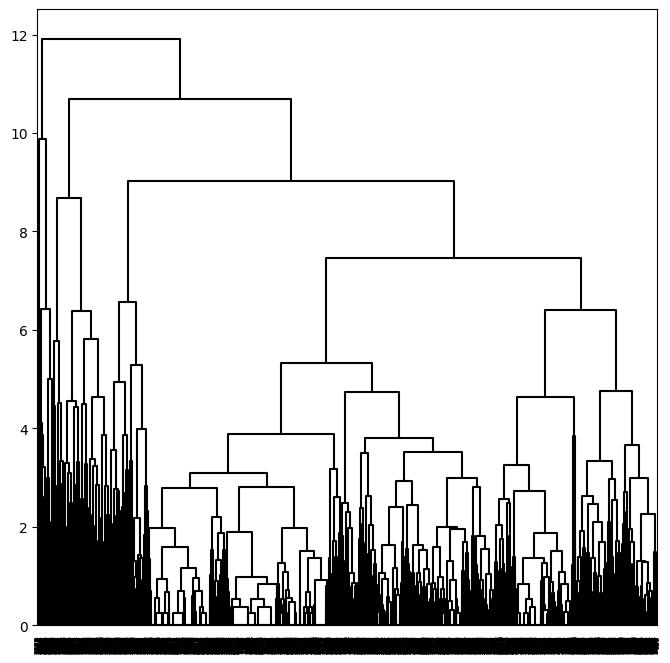

In [ ]:
cargs = {'color_threshold':-np.inf ,
'above_threshold_color':'black'}
linkage_comp = compute_linkage(hc_comp)
fig , ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp, ax=ax, **cargs);

In [ ]:
cut_tree(linkage_comp , height=7)

array([[0],
       [1],
       [1],
       ...,
       [1],
       [2],
       [1]])

In [ ]:
np.max(cut_tree(linkage_comp , height=7))

6

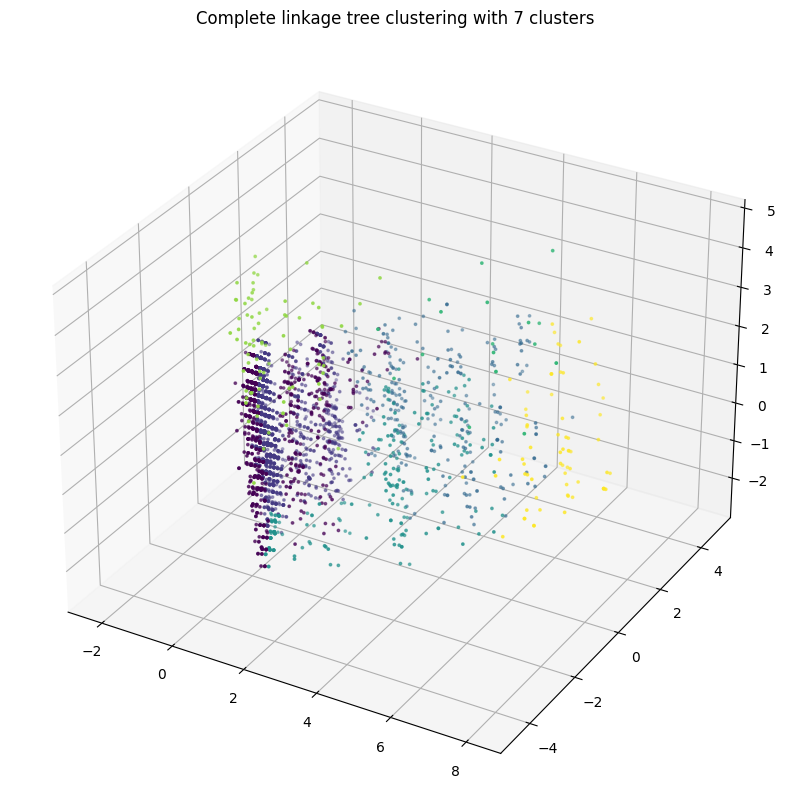

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(pca_4[:,0],pca_4[:,1],pca_4[:,2], c=cut_tree(linkage_comp , height=7), s=3)
ax.set_title("Complete linkage tree clustering with 7 clusters");

### Average

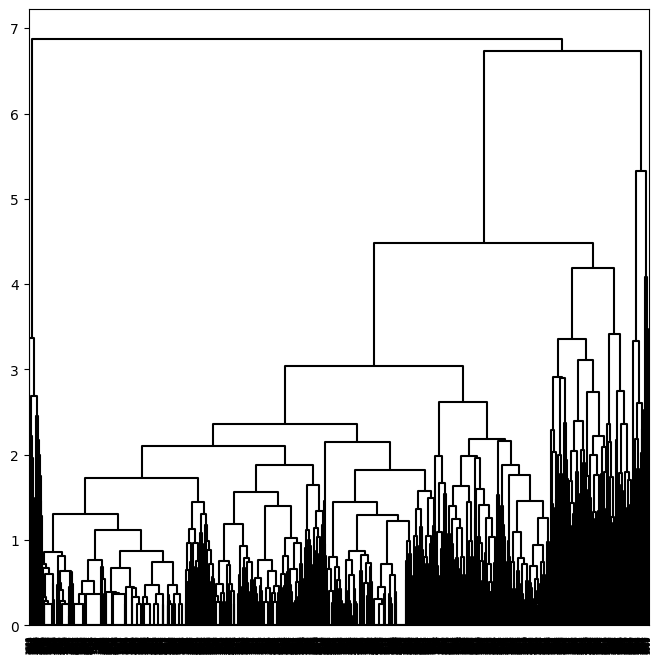

In [ ]:
cargs = {'color_threshold':-np.inf ,
'above_threshold_color':'black'}
linkage_avg = compute_linkage(hc_avg)
fig , ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_avg, ax=ax, **cargs);

### Single

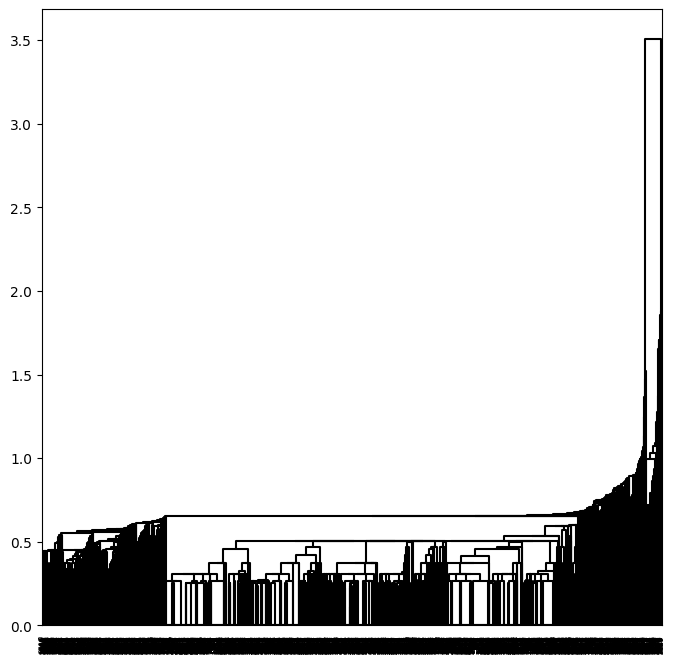

In [ ]:
cargs = {'color_threshold':-np.inf ,
'above_threshold_color':'black'}
linkage_sing = compute_linkage(hc_sing)
fig , ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_sing, ax=ax, **cargs);

# **Question 4:**

Is there a difference in under reporting of hiring
discrimination between males and females?

•To answer this, you have to build a prediction model using the data
for 3,479 participants to predict the response to the question about
the experience of hiring discrimination for the 97 participants who
responded as ‘NA’ even if they were eligible to respond as “Yes” or
“No”. Then, you have to predict the response for the 97 participants
and compare the distribution of the predicted response between
males and females. (See the next slide for specific objectives in each
step of the analysis)

•While building a prediction model, you have to consider two
methods (Random Forest, Penalized logistic regression with Lasso
penalty).


•You have to conduct a cross validation to identify the optimal tuning
parameter in each model.


•The predictive performance of each method should be compared by
AUC of the ROC for the test data. You have to choose the best
prediction model as the one with larger AUC.


•Once you choose the best prediction model, you have to determine
the optimal threshold for the binary prediction based on the ROC
curve such that the sum of sensitivity and specificity was maximized.

In [ ]:
# df_app_all = X_app.copy()
# df_app_all['disc_hire'] = y
# df_app_all # Original dataset with no Not Applicable data at all

## LASSO

In [ ]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from ISLP.models import \
(Stepwise ,
sklearn_selected ,
sklearn_selection_path)
!pip install l0bnb
from l0bnb import fit_path

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for l0bnb: filename=l0bnb-1.0.0-py3-none-any.whl size=22297 sha256=fb3f26c3ba22c1778453aaaa6448064e390ff0f1eb4f3fbdca0fd5fdfb531f98
  Stored in directory: /root/.cache/pip/wheels/db/c7/a3/a2e42159dcc85eeb004a84772e1884c45f88d43fac0075de19
Successfully built l0bnb


In [ ]:
lassoCV = skl.ElasticNetCV(n_alphas=100, l1_ratio=1)
pipeCV = Pipeline(steps=[('scaler', scaler), ('lasso', lassoCV)])
pipeCV.fit(X_app, y)
tuned_lasso = pipeCV.named_steps['lasso']
tuned_lasso.alpha_

0.0021786536754951147

In [ ]:
-np.log(0.0021786536754951147)

6.1290481730103625

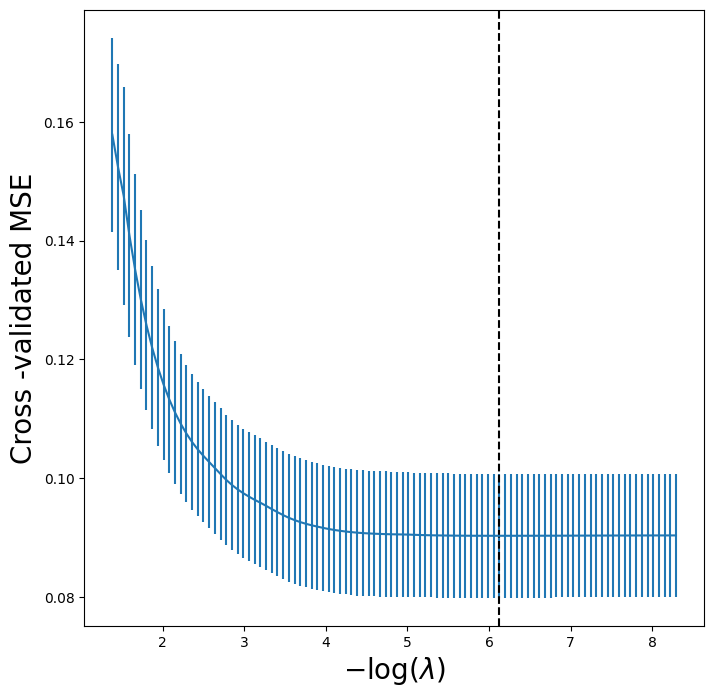

In [ ]:
K=5
lassoCV_fig , ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(tuned_lasso.alphas_),
tuned_lasso.mse_path_.mean(1),
yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross -validated MSE', fontsize=20);

In [ ]:
tuned_lasso.coef_

array([-0.003403,  0.009698, -0.001013, -0.014724,  0.02313 , -0.025819,
       -0.002628,  0.007461,  0.003798,  0.013161,  0.213954,  0.013982,
        0.      ,  0.026307,  0.00479 ,  0.029658,  0.049524])

### ROC of LASSO

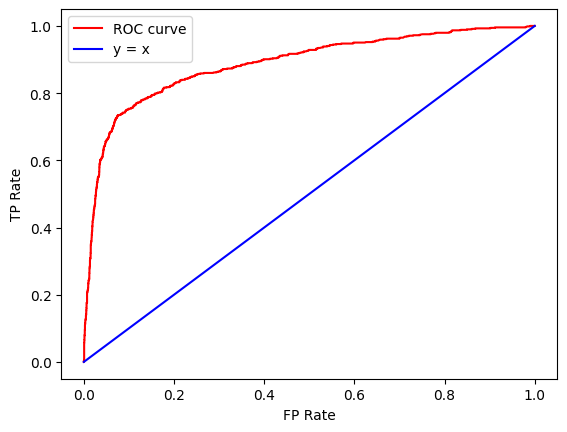

In [ ]:
y_score = X_scaled @ tuned_lasso.coef_

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, y_score)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

plt.xlabel('FP Rate')
plt.ylabel('TP Rate')

plt.legend() # 그래프 라벨 표시

plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y, y_score)) # 0.985260399606944

0.8867378775969494


In [ ]:
df

,disc_hire,gender,age,edu_cat,mariage,emp_fin,income_quartile,birth_region,health,disability,residence,disc_wage,disc_jobedu,disc_promotion,disc_resign,disc_edu,disc_home,disc_social
0,1.0,0,3,1,2,0,0,0,1,0,1,1,0,0,0,0,0,0
1,0.0,1,3,1,2,1,1,0,2,0,1,0,0,0,0,0,0,0
2,0.0,1,1,2,0,1,1,0,2,0,1,0,0,0,0,0,0,0
3,0.0,1,1,2,1,0,3,0,1,0,1,0,0,0,0,0,0,0
4,1.0,0,3,0,1,0,1,0,2,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,0.0,0,1,2,1,0,3,0,2,0,5,0,0,0,0,0,0,0
3572,0.0,0,1,1,1,1,0,0,1,0,3,0,2,0,2,0,0,0
3573,0.0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0
3574,0.0,0,1,2,1,0,0,0,1,0,8,0,0,2,2,0,0,0


In [ ]:
means

[0.15369088811995385,
 0.021856192587899906,
 0.06525974025974025,
 0.0204211869814933,
 0.01104148015517756,
 0.020851433536055605,
 0.07830106905518636]

In [ ]:
df_pred = df.copy()
df_pred = (df_pred - np.mean(df_pred,0)) / np.std(df_pred, 0)
df_pred

,disc_hire,gender,age,edu_cat,mariage,emp_fin,income_quartile,birth_region,health,disability,residence,disc_wage,disc_jobedu,disc_promotion,disc_resign,disc_edu,disc_home,disc_social
0,2.017778,-0.807299,0.842526,-0.157317,2.297356,-0.557540,-1.650287,-0.486328,-0.588002,-0.162501,-1.148209,1.948422,-0.366308,-0.451377,-0.385353,-0.232939,-0.164588,-0.295529
1,-0.495595,1.238698,0.842526,-0.157317,2.297356,1.793594,-0.705000,-0.486328,0.880360,-0.162501,-1.148209,-0.430396,-0.366308,-0.451377,-0.385353,-0.232939,-0.164588,-0.295529
2,-0.495595,1.238698,-0.832222,1.154024,-1.578721,1.793594,-0.705000,-0.486328,0.880360,-0.162501,-1.148209,-0.430396,-0.366308,-0.451377,-0.385353,-0.232939,-0.164588,-0.295529
3,-0.495595,1.238698,-0.832222,1.154024,0.359318,-0.557540,1.185574,-0.486328,-0.588002,-0.162501,-1.148209,-0.430396,-0.366308,-0.451377,-0.385353,-0.232939,-0.164588,-0.295529
4,2.017778,-0.807299,0.842526,-1.468658,0.359318,-0.557540,-0.705000,-0.486328,0.880360,-0.162501,-1.148209,-0.430396,-0.366308,-0.451377,-0.385353,-0.232939,-0.164588,2.946225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,-0.495595,-0.807299,-0.832222,1.154024,0.359318,-0.557540,1.185574,-0.486328,0.880360,-0.162501,-0.273942,-0.430396,-0.366308,-0.451377,-0.385353,-0.232939,-0.164588,-0.295529
3572,-0.495595,-0.807299,-0.832222,-0.157317,0.359318,1.793594,-1.650287,-0.486328,-0.588002,-0.162501,-0.711075,-0.430396,2.872050,-0.451377,2.707851,-0.232939,-0.164588,-0.295529
3573,-0.495595,-0.807299,-0.832222,-0.157317,0.359318,-0.557540,-1.650287,2.056227,-2.056364,-0.162501,-1.148209,-0.430396,-0.366308,-0.451377,-0.385353,-0.232939,-0.164588,-0.295529
3574,-0.495595,-0.807299,-0.832222,1.154024,0.359318,-0.557540,-1.650287,-0.486328,-0.588002,-0.162501,0.381758,-0.430396,-0.366308,2.496797,2.707851,-0.232939,-0.164588,-0.295529


In [ ]:
df_pred = df_pred[(df['disc_hire'] != 0).astype('bool') & (df['disc_hire'] != 1).astype('bool')] # Applicable Data
df_pred

,disc_hire,gender,age,edu_cat,mariage,emp_fin,income_quartile,birth_region,health,disability,residence,disc_wage,disc_jobedu,disc_promotion,disc_resign,disc_edu,disc_home,disc_social
58,NaN,1.238698,0.842526,1.154024,0.359318,1.793594,0.240287,-0.486328,-0.588002,-0.162501,-1.148209,4.327239,2.872050,2.496797,2.707851,4.554352,4.131531,2.946225
104,NaN,1.238698,0.842526,-1.468658,0.359318,1.793594,-0.705000,-0.486328,0.880360,-0.162501,-1.148209,4.327239,2.872050,2.496797,2.707851,-0.232939,-0.164588,-0.295529
141,NaN,1.238698,-0.832222,1.154024,0.359318,-0.557540,1.185574,-0.486328,-0.588002,-0.162501,-1.148209,1.948422,2.872050,1.022710,2.707851,4.554352,4.131531,2.946225
246,NaN,-0.807299,1.679899,-1.468658,0.359318,-0.557540,1.185574,-0.486328,2.348723,-0.162501,-1.148209,4.327239,2.872050,2.496797,2.707851,-0.232939,-0.164588,6.187979
273,NaN,-0.807299,0.842526,-0.157317,0.359318,-0.557540,0.240287,2.056227,-0.588002,-0.162501,-1.148209,4.327239,-0.366308,-0.451377,-0.385353,-0.232939,-0.164588,-0.295529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3283,NaN,1.238698,0.005152,-1.468658,0.359318,-0.557540,-0.705000,-0.486328,-0.588002,-0.162501,1.911726,4.327239,2.872050,2.496797,2.707851,-0.232939,-0.164588,2.946225
3315,NaN,-0.807299,0.842526,-0.157317,0.359318,-0.557540,-0.705000,-0.486328,-0.588002,-0.162501,1.911726,4.327239,-0.366308,-0.451377,1.161249,-0.232939,-0.164588,-0.295529
3343,NaN,1.238698,-0.832222,1.154024,0.359318,-0.557540,1.185574,2.056227,-0.588002,-0.162501,1.911726,1.948422,-0.366308,-0.451377,2.707851,4.554352,-0.164588,2.946225
3425,NaN,-0.807299,-0.832222,1.154024,0.359318,-0.557540,-0.705000,-0.486328,-0.588002,-0.162501,-0.711075,4.327239,2.872050,2.496797,2.707851,-0.232939,-0.164588,-0.295529


In [ ]:
X_test_disc_hire = df_pred.iloc[:,1:]
X_test_disc_hire

,gender,age,edu_cat,mariage,emp_fin,income_quartile,birth_region,health,disability,residence,disc_wage,disc_jobedu,disc_promotion,disc_resign,disc_edu,disc_home,disc_social
58,1.238698,0.842526,1.154024,0.359318,1.793594,0.240287,-0.486328,-0.588002,-0.162501,-1.148209,4.327239,2.872050,2.496797,2.707851,4.554352,4.131531,2.946225
104,1.238698,0.842526,-1.468658,0.359318,1.793594,-0.705000,-0.486328,0.880360,-0.162501,-1.148209,4.327239,2.872050,2.496797,2.707851,-0.232939,-0.164588,-0.295529
141,1.238698,-0.832222,1.154024,0.359318,-0.557540,1.185574,-0.486328,-0.588002,-0.162501,-1.148209,1.948422,2.872050,1.022710,2.707851,4.554352,4.131531,2.946225
246,-0.807299,1.679899,-1.468658,0.359318,-0.557540,1.185574,-0.486328,2.348723,-0.162501,-1.148209,4.327239,2.872050,2.496797,2.707851,-0.232939,-0.164588,6.187979
273,-0.807299,0.842526,-0.157317,0.359318,-0.557540,0.240287,2.056227,-0.588002,-0.162501,-1.148209,4.327239,-0.366308,-0.451377,-0.385353,-0.232939,-0.164588,-0.295529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3283,1.238698,0.005152,-1.468658,0.359318,-0.557540,-0.705000,-0.486328,-0.588002,-0.162501,1.911726,4.327239,2.872050,2.496797,2.707851,-0.232939,-0.164588,2.946225
3315,-0.807299,0.842526,-0.157317,0.359318,-0.557540,-0.705000,-0.486328,-0.588002,-0.162501,1.911726,4.327239,-0.366308,-0.451377,1.161249,-0.232939,-0.164588,-0.295529
3343,1.238698,-0.832222,1.154024,0.359318,-0.557540,1.185574,2.056227,-0.588002,-0.162501,1.911726,1.948422,-0.366308,-0.451377,2.707851,4.554352,-0.164588,2.946225
3425,-0.807299,-0.832222,1.154024,0.359318,-0.557540,-0.705000,-0.486328,-0.588002,-0.162501,-0.711075,4.327239,2.872050,2.496797,2.707851,-0.232939,-0.164588,-0.295529


In [ ]:
y_pred = X_test_disc_hire @ tuned_lasso.coef_
y_pred = np.round(y_pred)
y_pred

58      1.0
104     1.0
141     1.0
246     1.0
273     1.0
       ... 
3283    1.0
3315    1.0
3343    1.0
3425    1.0
3459    1.0
Length: 97, dtype: float64

### LASSO Prediction Results

In [ ]:
y_pred = np.round(y_pred)

## Random Forest

In [ ]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from ISLP import load_data , confusion_table
from ISLP.models import ModelSpec as MS

from sklearn.tree import (DecisionTreeClassifier as DTC ,
DecisionTreeRegressor as DTR ,
plot_tree ,
export_text)
from sklearn.metrics import (accuracy_score ,
log_loss)
from sklearn.ensemble import \
(RandomForestRegressor as RF,
GradientBoostingRegressor as GBR)
from ISLP.bart import BART

from sklearn.metrics import mean_squared_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.3, random_state=1)

In [ ]:
# Fit random forest regressor
Feature_Error = []

rgr = RF(max_features=None)
rgr.fit(X_train, y_train)
Feature_Error.append(mean_squared_error(y_test, rgr.predict(X_test)))

rgr = RF(max_features="sqrt")
rgr.fit(X_train, y_train)
Feature_Error.append(mean_squared_error(y_test, rgr.predict(X_test)))

rgr = RF(max_features="log2")
rgr.fit(X_train, y_train)
Feature_Error.append(mean_squared_error(y_test, rgr.predict(X_test)))

Feature_Error

[0.09755834340265714, 0.0955874759444273, 0.09493297373349008]

In [ ]:
rgr = RF(max_features="sqrt")
rgr.fit(X_scaled, y)

RandomForestRegressor(max_features='sqrt')

### ROC of RF

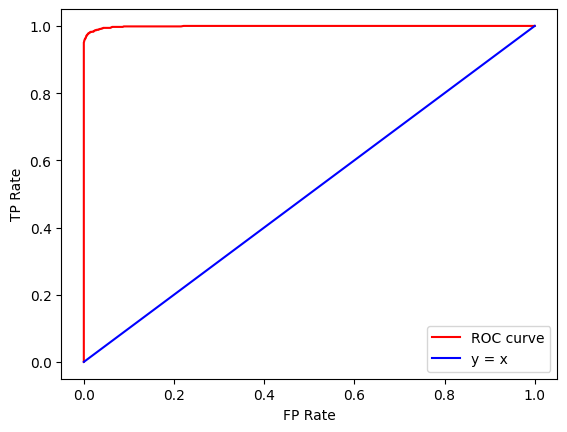

In [ ]:
y_score = rgr.predict(X_scaled)

fpr, tpr, thresholds = roc_curve(y, y_score)

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

plt.xlabel('FP Rate')
plt.ylabel('TP Rate')

plt.legend() # 그래프 라벨 표시

plt.show()

RF performs better!!

In [ ]:
print(roc_auc_score(y, y_score)) # 0.985260399606944

0.9988478589226086


### Results of RF

In [ ]:
np.round(rgr.predict(X_test_disc_hire))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.])

In [ ]:
disc_hire_pred = np.round(rgr.predict(X_test_disc_hire))

### Checking difference between males and females

In [ ]:
gender_for_NA = df.copy()[(df['disc_hire'] != 0).astype('bool') & (df['disc_hire'] != 1).astype('bool')] # Applicable Data
gender_for_NA = gender_for_NA['gender']

In [ ]:
num_male = 0
num_female = 0
male_report = 0
female_report = 0

for i in range(len(disc_hire_pred)):
  if gender_for_NA.iloc[i] == 0:
    num_male += 1
  else:
    num_female += 1
  if gender_for_NA.iloc[i] == 0 and disc_hire_pred[i] == 1:
    male_report += 1
  elif gender_for_NA.iloc[i] == 1 and disc_hire_pred[i] == 1:
    female_report += 1

male_report_ratio = male_report / num_male
female_report_ratio = female_report / num_female
print("male_report_ratio = ", male_report_ratio)
print("female_report_ratio = ", female_report_ratio)

male_report_ratio =  0.359375
female_report_ratio =  0.8181818181818182


# **Question 5:**

Is there an association between the
experience of hiring discrimination and health?

•To answer this, you have to compare the distribution of self
rated health among the four groups of people whose response
was (1) No’, (2) ‘Yes, (3) NA’ but predicted as ‘No’, and (4) ‘NA’
but predicted as ‘Yes’.

•To compare the distribution, you may just take ‘Self rated
health’ as a continuous variable.

•You have to conduct an overall test to see if there is a
difference among the 4 groups and pairwise comparison
applying an appropriate method for multiple testing
adjustment.

In [ ]:
disc_n_health_1 = df.copy()  # No
disc_n_health_2 = df.copy()  # Yes
disc_n_health_1 = disc_n_health_1[disc_n_health_1['disc_hire']==0]
disc_n_health_1 = disc_n_health_1[['disc_hire','health']]
disc_n_health_2 = disc_n_health_2[disc_n_health_2['disc_hire']==1]
disc_n_health_2 = disc_n_health_2[['disc_hire','health']]

In [ ]:
X_test_disc_hire.index

Int64Index([  58,  104,  141,  246,  273,  338,  835,  862,  886,  909,  918,
             942, 1064, 1067, 1142, 1153, 1154, 1166, 1167, 1185, 1187, 1188,
            1204, 1210, 1245, 1267, 1293, 1296, 1321, 1348, 1398, 1415, 1460,
            1461, 1471, 1480, 1539, 1581, 1596, 1598, 1599, 1602, 1651, 1658,
            1677, 1693, 1746, 1784, 1961, 2035, 2037, 2059, 2062, 2066, 2100,
            2427, 2451, 2510, 2511, 2513, 2547, 2563, 2632, 2659, 2728, 2750,
            2761, 2786, 2855, 2878, 2915, 2921, 2974, 3009, 3091, 3114, 3115,
            3116, 3119, 3120, 3127, 3133, 3138, 3139, 3140, 3142, 3147, 3149,
            3152, 3165, 3176, 3279, 3283, 3315, 3343, 3425, 3459],
           dtype='int64')

In [ ]:
ind_list_3 = []
ind_list_4 = []
for i in range(len(disc_hire_pred)):
  if disc_hire_pred[i] == 0:
    ind_list_3.append(X_test_disc_hire.index[i])
  else:
    ind_list_4.append(X_test_disc_hire.index[i])

In [ ]:
disc_n_health_3 = df.copy()  # NA predicted as No
disc_n_health_4 = df.copy()  # NA predicted as Yes
disc_n_health_3 = disc_n_health_3.iloc[ind_list_3]
disc_n_health_3 = disc_n_health_3[['disc_hire','health']]
disc_n_health_4 = disc_n_health_4.iloc[ind_list_4]
disc_n_health_4 = disc_n_health_4[['disc_hire','health']]
# disc_n_health_4

In [ ]:
dist1 = np.array(disc_n_health_1['health'].value_counts())
dist2 = np.array(disc_n_health_2['health'].value_counts())
dist3 = np.array(disc_n_health_3['health'].value_counts())
dist4 = np.array(disc_n_health_4['health'].value_counts())

In [ ]:
dist1 = dist1 / np.sum(dist1)
dist2 = dist2 / np.sum(dist2)
dist3 = dist3 / np.sum(dist3)
dist4 = dist4 / np.sum(dist4)
print(dist1, dist2, dist3, dist4)

[0.587898 0.30648  0.055854 0.049767] [0.527697 0.344023 0.102041 0.026239] [0.702128 0.170213 0.106383 0.021277] [0.48 0.3  0.16 0.06]


Text(0.5, 1.0, 'dist4')

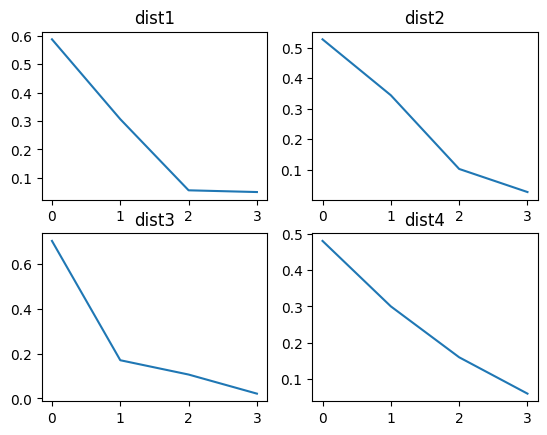

In [ ]:
plt.subplots(2,2)
plt.subplot(2,2,1)
plt.plot(dist1)
plt.title('dist1')
plt.subplot(2,2,2)
plt.plot(dist2)
plt.title('dist2')
plt.subplot(2,2,3)
plt.plot(dist3)
plt.title('dist3')
plt.subplot(2,2,4)
plt.plot(dist4)
plt.title('dist4')

In [ ]:
pip install scipy statsmodels

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Assuming you have four DataFrames: df1, df2, df3, df4

# Concatenate the DataFrames vertically
data = pd.concat([disc_n_health_1, disc_n_health_2, disc_n_health_3, disc_n_health_4], keys=['G1', 'G2', 'G3', 'G4'])

# Create a contingency table
contingency_table = pd.crosstab(data.index.get_level_values(0), data['health'])

# Overall Test (Chi-Square)
chi2, p, _, _ = chi2_contingency(contingency_table)

# Pairwise Comparisons with Tukey's HSD correction
pairwise_test = pairwise_tukeyhsd(data['health'], data.index.get_level_values(0))

# Print results
print(f"Overall Chi-Square Test: Chi2 = {chi2}, p-value = {p}")
print(pairwise_test.summary())


Overall Chi-Square Test: Chi2 = 44.1060153352378, p-value = 1.349338405457055e-06
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    G1     G2   0.1534    0.0  0.0791 0.2278   True
    G1     G3  -0.0067 0.9999 -0.2632 0.2498  False
    G1     G4   0.1916 0.1961 -0.0572 0.4404  False
    G2     G3  -0.1602 0.3985 -0.4231 0.1028  False
    G2     G4   0.0381 0.9808 -0.2173 0.2936  False
    G3     G4   0.1983 0.4752  -0.156 0.5526  False
---------------------------------------------------
